The purpose of this notebook is to evaluate GPDs $G_q(x,\eta,t)$ as well as their conformal moments $\mathbb{G}_q(n,\eta,t)$, where, for a generic GPD, we have its conformal moment expansion
\begin{equation}
G_q(x,\eta,t)=\sum_{n=0}^\infty (-1)^{n}p_n(x,\eta)\mathbb{F}_q(n,\eta,t),\qquad G_g(x,\eta,t)=\sum_{n=1}^\infty (-1)^{n-1}\, {^g\!p}_n(x,\eta) \mathbb{G}_g(n,\eta,t),
\end{equation}
where $G=H,E,\widetilde{H},\widetilde{E},H^T,E^T,\widetilde{H}^T,\widetilde{E}^T$.

To this end, we import the MSTW PDF parametrization of PDFs. The conformal moments are obtained by Reggeized $x$ integrals over PDFs at some input scale $\mu_0=1$ GeV and evolved using the pertinent RGEs.

In [1]:
# Import necessary libraries and set display options
from scipy.integrate import quad
import time

from GPD_functions import *
from GPD_data import *

# Set display options
np.set_printoptions(linewidth=200)

Plots of conformal moments $\mathbb{G}_q(n,\eta,t)$ and their RGE evolution

Momentum space

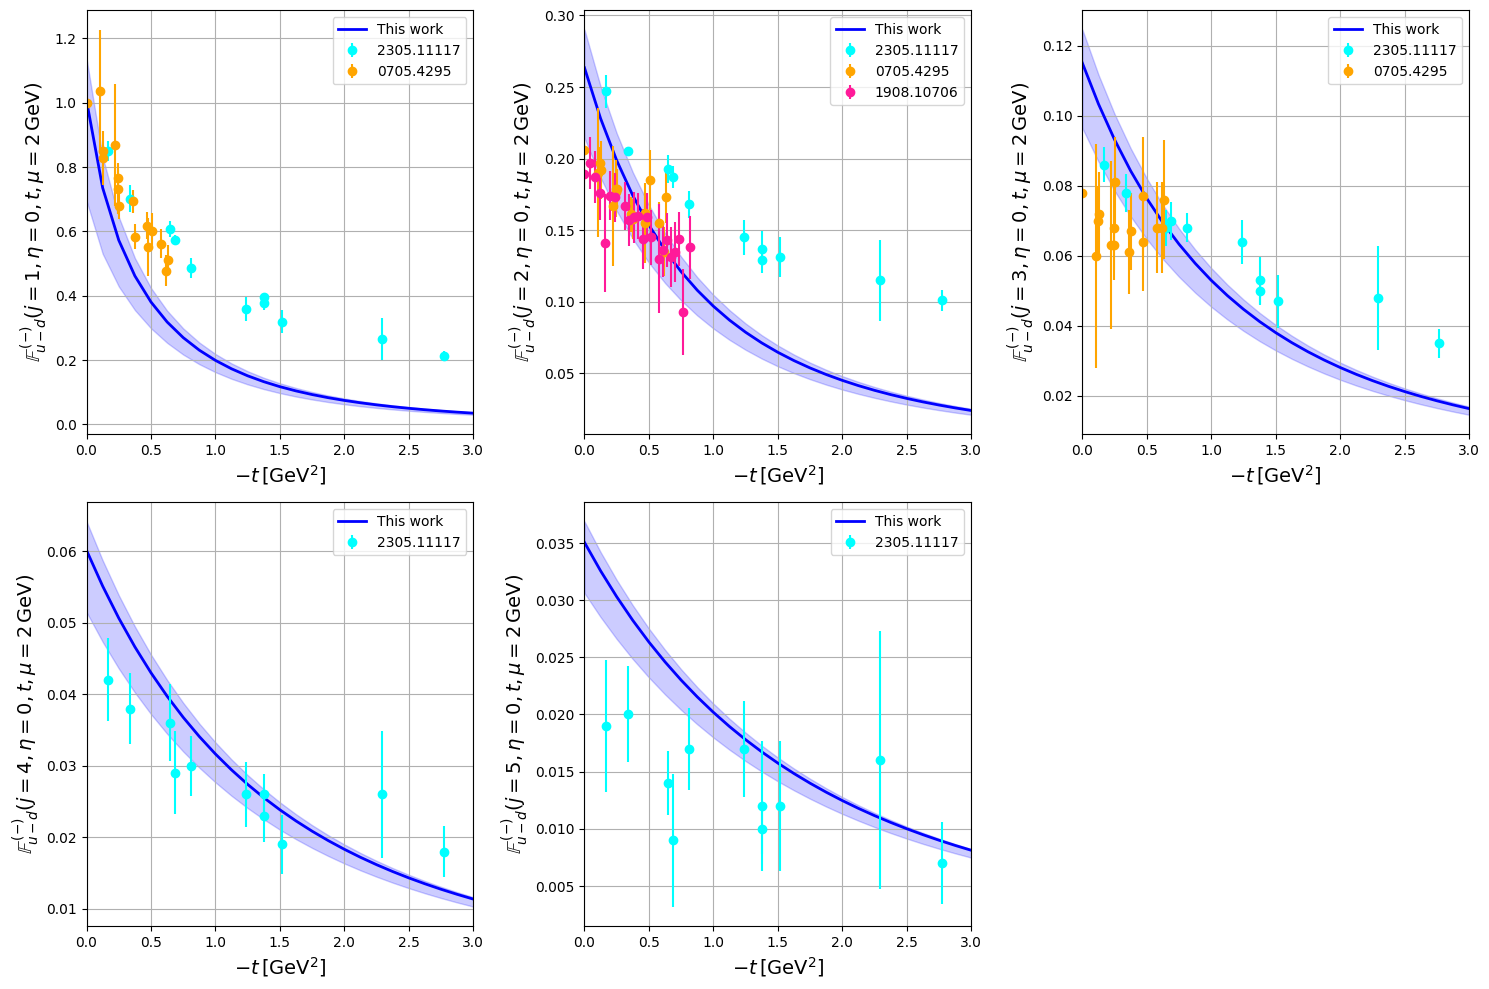

In [2]:
#NonSingletIsovector
y_label = "$\\mathbb{{F}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "NonSingletIsovector"
moment_label = "A"

plot_moments(moment_type, moment_label,y_label,3,25)

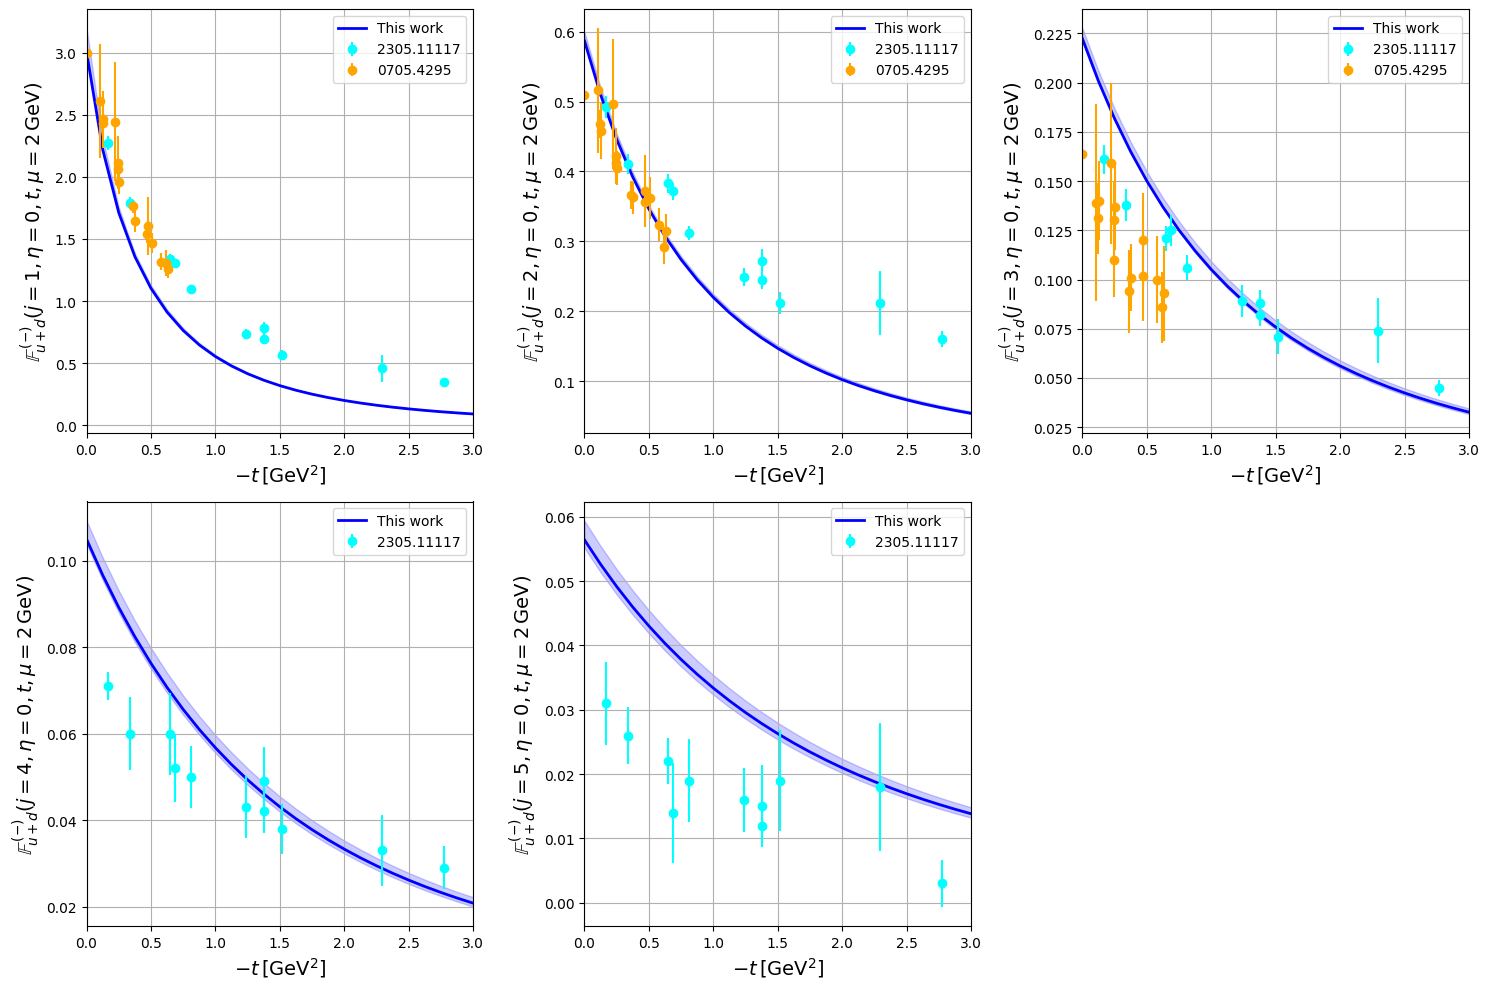

In [3]:
# NonSingletIsoscalar
y_label = "$\\mathbb{{F}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "NonSingletIsoscalar"
moment_label = "A"

plot_moments(moment_type, moment_label,y_label,3,25)

Impact parameter representation

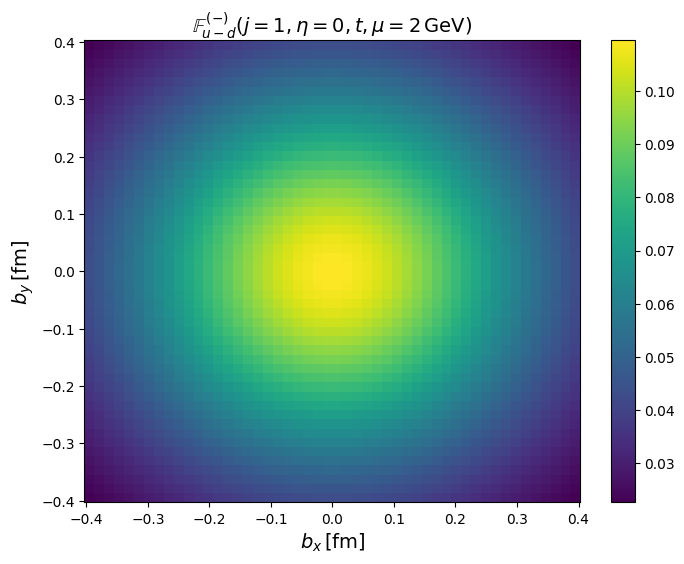

In [2]:
# Plot NonSingletIsovector in 2D impact parameter space
moment_type = "NonSingletIsovector"
moment_label = "A"
plot_title = "$\\mathbb{{F}}_{{u-d}}^{{\,\,(-)}}$"
plot_fourier_transform_moments(moment_type,moment_label,plot_title, 1, 2)

Conformal Moments and their evolution

In [2]:
# Define singlet conformal moments and their evolution
def diagonal_singlet(j,eta,t,Nf=3,evolve_type="vector",solution="+",error_type="central"):
    # Switch sign
    if solution == "+":
        solution = "-"
    elif solution == "-":
        solution = "+"
    else:
        raise ValueError("Invalid solution type. Use '+' or '-'.")
    if evolve_type == "vector":
        result = (quark_singlet_Regge(j,eta,t,Nf,error_type)
                  + j/6*gamma_qg(j-1,Nf,evolve_type)
                  /(gamma_qq(j-1)-gamma_pm(j-1,Nf,evolve_type,solution))
                  *gluon_Regge(j,eta,t, error_type))
        return result
    # if evolve_type == "vector":
    #     result = (quark_singlet_Regge(j,eta,t,Nf,error_type)
    #               + 1/6*gamma_qg(j-1,Nf,evolve_type)
    #               /(gamma_qq(j-1)-gamma_pm(j-1,Nf,evolve_type,solution))
    #               *gluon_Regge(j,eta,t, error_type))
    #     return result
    elif evolve_type == "axial":
        print("Axial is ToDo")
        return 0
    else:
        raise ValueError("Type must be vector or axial")


def diagonal_singlet_A(j,eta,t,Nf=3,evolve_type="vector",solution="+",error_type="central"):
    # Switch sign
    if solution == "+":
        solution = "-"
    elif solution == "-":
        solution = "+"
    else:
        raise ValueError("Invalid solution evolve_type. Use '+' or '-'.")
    if evolve_type == "vector":
        result = (quark_singlet_Regge_A(j,eta,t,Nf,error_type)
                  + j/6*gamma_qg(j-1,Nf,evolve_type)
                  /(gamma_qq(j-1)-gamma_pm(j-1,Nf,evolve_type,solution))
                  *gluon_Regge_A(j,eta,t, error_type))
        return result
    elif evolve_type == "axial":
        print("Axial is ToDo")
        return 0
    else:
        raise ValueError("Type must be vector or axial")
    
def diagonal_singlet_D(j,eta,t,Nf=3,evolve_type="vector",solution="+",error_type="central"):
    # Switch sign
    if solution == "+":
        solution = "-"
    elif solution == "-":
        solution = "+"
    else:
        raise ValueError("Invalid solution evolve_type. Use '+' or '-'.")
    if evolve_type == "vector":
        result = (quark_singlet_Regge_D(j,eta,t,Nf,error_type)
                  + j/6*gamma_qg(j-1,Nf,evolve_type)
                  /(gamma_qq(j-1)-gamma_pm(j-1,Nf,evolve_type,solution))
                  *gluon_Regge_D(j,eta,t, error_type))
        return result
    elif evolve_type == "axial":
        print("Axial is ToDo")
        return 0
    else:
        raise ValueError("Type must be vector or axial")

def evolve_quark_singlet(j,eta,t,mu,Nf=3,evolve_type="vector",error_type="central"):
    # Manually fix the scale to 0.51 @ mu = 2 GeV from 2310.08484
    A0 = 0.51/0.6237
    GPD_in_p = diagonal_singlet(j, eta, t, Nf, evolve_type, "+", error_type)
    GPD_in_m = diagonal_singlet(j, eta, t, Nf, evolve_type, "-", error_type)
    term_1 = gamma_qq(j-1)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    term_2 = (Gamma_pm(j-1,Nf,evolve_type,"-")*evolve_conformal_moment(GPD_in_p,j-1,mu,Nf,evolve_type,"+")
              -Gamma_pm(j-1,Nf,evolve_type,"+")*evolve_conformal_moment(GPD_in_m,j-1,mu,Nf,evolve_type,"-"))
    result = A0*term_1*term_2
    return result

def evolve_quark_singlet_A(j,eta,t,mu,Nf=3,evolve_type="vector",error_type="central"):
    # Manually fix the scale to 0.51 @ mu = 2 GeV from 2310.08484
    A0 = 0.51/0.6237
    GPD_in_p = diagonal_singlet_A(j, eta, t, Nf, evolve_type, "+", error_type)
    GPD_in_m = diagonal_singlet_A(j, eta, t, Nf, evolve_type, "-", error_type)
    term_1 = gamma_qq(j-1)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    term_2 = (Gamma_pm(j-1,Nf,evolve_type,"-")*evolve_conformal_moment(GPD_in_p,j-1,mu,Nf,evolve_type,"+")
              -Gamma_pm(j-1,Nf,evolve_type,"+")*evolve_conformal_moment(GPD_in_m,j-1,mu,Nf,evolve_type,"-"))
    result = A0*term_1*term_2
    return result

def evolve_quark_singlet_D(j,eta,t,mu,Nf=3,evolve_type="vector",error_type="central"):
    # Manually fix the scale to 0.51 @ mu = 2 GeV from 2310.08484
    D0 = -1.3/1.277
    GPD_in_p = diagonal_singlet_D(j, eta, t, Nf, evolve_type, "+", error_type)
    GPD_in_m = diagonal_singlet_D(j, eta, t, Nf, evolve_type, "-", error_type)
    term_1 = gamma_qq(j-1)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    term_2 = (Gamma_pm(j-1,Nf,evolve_type,"-")*evolve_conformal_moment(GPD_in_p,j-1,mu,Nf,evolve_type,"+")
              -Gamma_pm(j-1,Nf,evolve_type,"+")*evolve_conformal_moment(GPD_in_m,j-1,mu,Nf,evolve_type,"-"))
    result = D0*term_1*term_2
    return result

def evolve_gluon(j,eta,t,mu,Nf=3,evolve_type="vector",error_type="central"):
    # Manually fix the scale to 0.501 @ mu = 2 GeV from 2310.08484
    A0 = 0.501/1.018
    GPD_in_p = diagonal_singlet(j, eta, t, Nf, evolve_type, "+", error_type)
    GPD_in_m = diagonal_singlet(j, eta, t, Nf, evolve_type, "-", error_type)
    term_1 = 6/j*gamma_gq(j-1,evolve_type)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    #term_1 = 6*gamma_gq(j-1,evolve_type)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    term_2 = (evolve_conformal_moment(GPD_in_p,j-1,mu,Nf,evolve_type,"+")
              -evolve_conformal_moment(GPD_in_m,j-1,mu,Nf,evolve_type,"-"))
    result = A0*term_1*term_2
    return result
    
def evolve_gluon_A(j,eta,t,mu,Nf=3,evolve_type="vector",error_type="central"):
    # Manually fix the scale to 0.501 @ mu = 2 GeV from 2310.08484
    A0 = 0.501/1.018
    GPD_in_p = diagonal_singlet_A(j, eta, t, Nf, evolve_type, "+", error_type)
    GPD_in_m = diagonal_singlet_A(j, eta, t, Nf, evolve_type, "-", error_type)
    term_1 = 6/j*gamma_gq(j-1,evolve_type)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    #term_1 = 6*gamma_gq(j-1,evolve_type)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    term_2 = (evolve_conformal_moment(GPD_in_p,j-1,mu,Nf,evolve_type,"+")
              -evolve_conformal_moment(GPD_in_m,j-1,mu,Nf,evolve_type,"-"))
    result = A0*term_1*term_2
    return result

def evolve_gluon_D(j,eta,t,mu,Nf=3,evolve_type="vector",error_type="central"):
    # Manually fix the scale from holography (II.9) in 2204.08857
    D0 = 2.57/8.635
    GPD_in_p = diagonal_singlet_D(j, eta, t, Nf, evolve_type, "+", error_type)
    GPD_in_m = diagonal_singlet_D(j, eta, t, Nf, evolve_type, "-", error_type)
    term_1 = 6/j*gamma_gq(j-1,evolve_type)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    #term_1 = 6*gamma_gq(j-1,evolve_type)/(gamma_pm(j-1,Nf,evolve_type,"+")-gamma_pm(j-1,Nf,evolve_type,"-"))
    term_2 = (evolve_conformal_moment(GPD_in_p,j-1,mu,Nf,evolve_type,"+")
              -evolve_conformal_moment(GPD_in_m,j-1,mu,Nf,evolve_type,"-"))
    result = D0*term_1*term_2
    return result

In [ ]:
# 0.510024649589122
# 0.5100256941533923
# -1.30044714988575
# 0.50111263175031
# 0.5011083820962285
# -2.57000756593034

In [7]:
print(evolve_quark_singlet(2,0,-0.001,2,3,"vector","central"))
print(evolve_quark_singlet_A(2,0,-0.001,2,3,"vector","central"))
print(evolve_quark_singlet_D(2,0,-0.001,2,3,"vector","central"))
print(evolve_gluon(2,0,-0.001,2,3,"vector","central"))
print(evolve_gluon_A(2,0,-0.001,2,3,"vector","central"))
print(evolve_gluon_D(2,0,-0.001,2,3,"vector","central"))

0.5100256941533923
0.5100256941533923
-1.300447151579804
0.5011083820962285
0.5011083820962285
-2.570007566013507


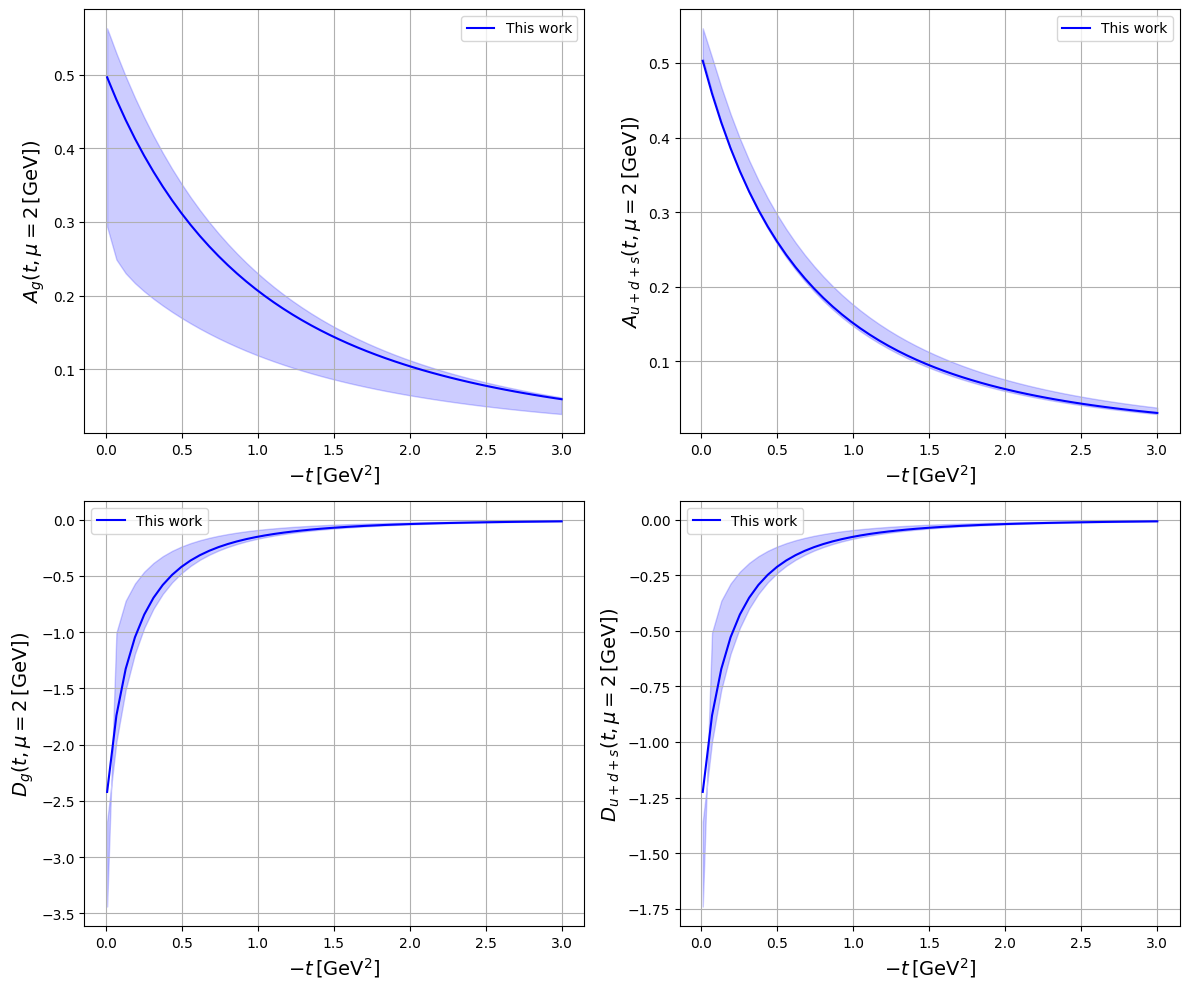

In [8]:
# Plot the evolved singlet conformal moments
def compute_results(evolve_function, j, eta, t_values, mu , Nf = 3, evolve_type = "vector"):
    """Compute central, plus, and minus results for a given evolution function."""
    results = [float(evolve_function(j, eta, t, mu, Nf, evolve_type, "central")) for t in t_values]
    results_plus = [float(evolve_function(j, eta, t, mu, Nf, evolve_type, "plus")) for t in t_values]
    results_minus = [float(evolve_function(j, eta, t, mu, Nf, evolve_type, "minus")) for t in t_values]
    return results, results_plus, results_minus

def plot_results(ax, t_values, results, results_plus, results_minus, xlabel, ylabel):
    """Plot results on the given axis."""
    ax.plot(-t_values, results, label="This work", color="blue")
    ax.fill_between(-t_values, results_minus, results_plus, color="blue", alpha=0.2)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(True)
    ax.legend()

def plot_evolve_gluon(t_values):
    """Generate data for the gluon evolution plot."""
    return compute_results(evolve_gluon, 2, 0, t_values, 2, 3, "vector")

def plot_evolve_quark_singlet(t_values):
    """Generate data for the quark singlet evolution plot."""
    return compute_results(evolve_quark_singlet, 2, 0, t_values, 2, 3, "vector")

def plot_evolve_gluon_D(t_values):
    """Generate data for the gluon evolution plot."""
    return compute_results(evolve_gluon_D, 2, 0, t_values, 2, 3, "vector")

def plot_evolve_quark_singlet_D(t_values):
    """Generate data for the quark singlet evolution plot."""
    return compute_results(evolve_quark_singlet_D, 2, 0, t_values, 2, 3, "vector")

# Main script
t_values = np.linspace(-1e-2, -3, 50)  # Generate values of t

# Parallelize data computation
results = Parallel(n_jobs=-1)(
    delayed(func)(t_values) for func in [
        plot_evolve_gluon, 
        plot_evolve_quark_singlet,
        plot_evolve_gluon_D, 
        plot_evolve_quark_singlet_D
    ]
)

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Plot results for each function
plot_results(
    axes[0], t_values, *results[0],
    xlabel="$-t\,[\mathrm{GeV}^2]$",
    ylabel="$A_g(t,\mu = 2\,[\mathrm{GeV}])$",
)
plot_results(
    axes[1], t_values, *results[1],
    xlabel="$-t\,[\mathrm{GeV}^2]$",
    ylabel="$A_{u+d+s}(t,\mu = 2\,[\mathrm{GeV}])$",
)
plot_results(
    axes[2], t_values, *results[2],
    xlabel="$-t\,[\mathrm{GeV}^2]$",
    ylabel="$D_g(t,\mu = 2\,[\mathrm{GeV}])$",
)
plot_results(
    axes[3], t_values, *results[3],
    xlabel="$-t\,[\mathrm{GeV}^2]$",
    ylabel="$D_{u+d+s}(t,\mu = 2\,[\mathrm{GeV}])$",
)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Define the conformal partial waves

In [3]:
# Define conformal partial waves
def conformal_pw_q(j, x, eta, parity="even"):
    """
    Calculate the conformal partial waves for quark GPDs and generate their
    respective "even" or "odd" combinations.

    Parameters:
    j (complex): Conformal spin
    x (float): Value of parton x
    eta (float): Value of skewness
    parity (str, optional): The parity of the function. Either 'even' or 'odd'. Default is 'even'.

    Returns:
    mpc: Value of even or odd combination of conformal quark partial waves

    Raises:
    ValueError: If the `parity` argument is not "even" or "odd".

    Notes:
    - Branch cut starting at j < 1
    - The result is vectorized later on using np.vectorize for handling array inputs.
    """
    # Precompute factors that do not change
    gamma_term = lambda j: 2.0**j * gamma(1.5 + j) / (gamma(0.5) * gamma(j))
    sin_pi_j = lambda j: np.sin(np.pi * j)
    sin_term = 1 / np.pi  # We divide by sin(pi j) in the SW transform

    def cal_P(x):
        arg = (1 + x / eta)
        hyp = mp.hyp2f1(-j, j + 1, 2, 0.5 * arg)
        result = arg * hyp * gamma_term(j)/sin_pi_j(j)
        return result
    def cal_Q(x): 
        hyp = mp.hyp2f1(0.5 * j, 0.5 * (j + 1), 1.5 + j, (eta / x)**2) 
        result = hyp * sin_term
        return result
    
    if parity not in ["even", "odd","none"]:
        raise ValueError("Parity must be even, odd or none")

    def p_j(x):
        # Initialize P_term and Q_term with zero
        P_term = 0
        Q_term = 0        
        if eta - np.abs(x) >= 0 :  # If condition for cal_P is satisfied
            # Note continuity at x = eta gives cal_P = cal_Q
            P_term = 1 / eta**j * cal_P(x)
        elif x - eta > 0 :
            Q_term = 1 / x**j * cal_Q(x)
        return P_term + Q_term
    
    if parity == "even":    # Even parity
        result = p_j(x) + p_j(-x)
    elif parity == "odd":   # Odd parity
        result = p_j(x) - p_j(-x)
    else :
        result = p_j(x)     # No parity for non_singlet

    conformal_pw = np.complex128(result)
    return conformal_pw
# Vectorize
vectorized_conformal_pw_q = np.vectorize(conformal_pw_q, otypes=[np.complex128])


def conformal_pw_g(j, x, eta, parity="even"):
    """
    Calculate the conformal partial waves for gluon GPDs and generate their
    respective "even" or "odd" parity combinations.

    Parameters:
    j (complex): Conformal spin
    x (float): Value of parton x
    eta (float): Value of skewness
    parity (str, optional): The parity of the function. Either 'none', 'even' or 'odd'. Default is 'even'.

    Returns:
    mpc: Value of even or odd combination of conformal gluno partial waves

    Raises:
    ValueError: If the `parity` argument is not "even" or "odd".

    Notes:
    - Branch cut starting at j < 2
    - The result is vectorized later on using np.vectorize for handling array inputs.
    """
    # Precompute factors that do not change
    gamma_term = lambda j: 2.0**(j-1) * gamma(1.5 + j) / (gamma(0.5) * gamma(j-1))
    sin_pi_j = lambda j: np.sin(np.pi * (j))
    sin_term = -1 / np.pi   # We divide by sin(pi j) in the SW transform
                            # sin(pi (j+1))/sin(pi j) = - 1

    def cal_P(x):
        arg = (1. + x / eta)
        hyp = mp.hyp2f1(-j, j + 1, 3, 0.5 * arg)
        result = arg**2 * hyp * gamma_term(j)/sin_pi_j(j)
        return result
    def cal_Q(x): 
        hyp = mp.hyp2f1(0.5 * (j-1), 0.5 * j, 1.5 + j, (eta / x)**2) 
        result = hyp * sin_term
        return result
    
    if parity not in ["even", "odd","none"]:
        raise ValueError("Parity must be even, odd or none")

    def p_j(x):
        # Initialize P_term and Q_term with zero
        P_term = 0
        Q_term = 0        
        if eta - np.abs(x) >= 0 :  # If condition for cal_P is satisfied
            P_term = 1 / eta**(j-1) * cal_P(x)
        elif x - eta > 0 :
            Q_term = 1 / x**(j-1) * cal_Q(x)
        return P_term + Q_term
    
    if parity == "even":    # Even parity
        result = p_j(x) + p_j(-x)
    elif parity == "odd":   # Odd parity
        result = p_j(x) - p_j(-x)
    else :
        result = p_j(x)     # No parity
    conformal_pw = np.complex128(result)
    return conformal_pw
# Vectorize
vectorized_conformal_pw_g = np.vectorize(conformal_pw_g, otypes=[np.complex128])

def j_base_q(parity="none"):
    if parity == "even":
        j_base = 1
    elif parity == "odd":
        j_base = 2
    elif parity == "none":
        j_base = 1
    else :
        raise ValueError("Parity must be even, odd or none")
    return j_base

def j_base_g(parity="none"):
    if parity == "even":
        j_base = 3
    elif parity == "odd":
        j_base = 2
    elif parity == "none":
        j_base = 2
    else :
        raise ValueError("Parity must be even, odd or none")
    return j_base

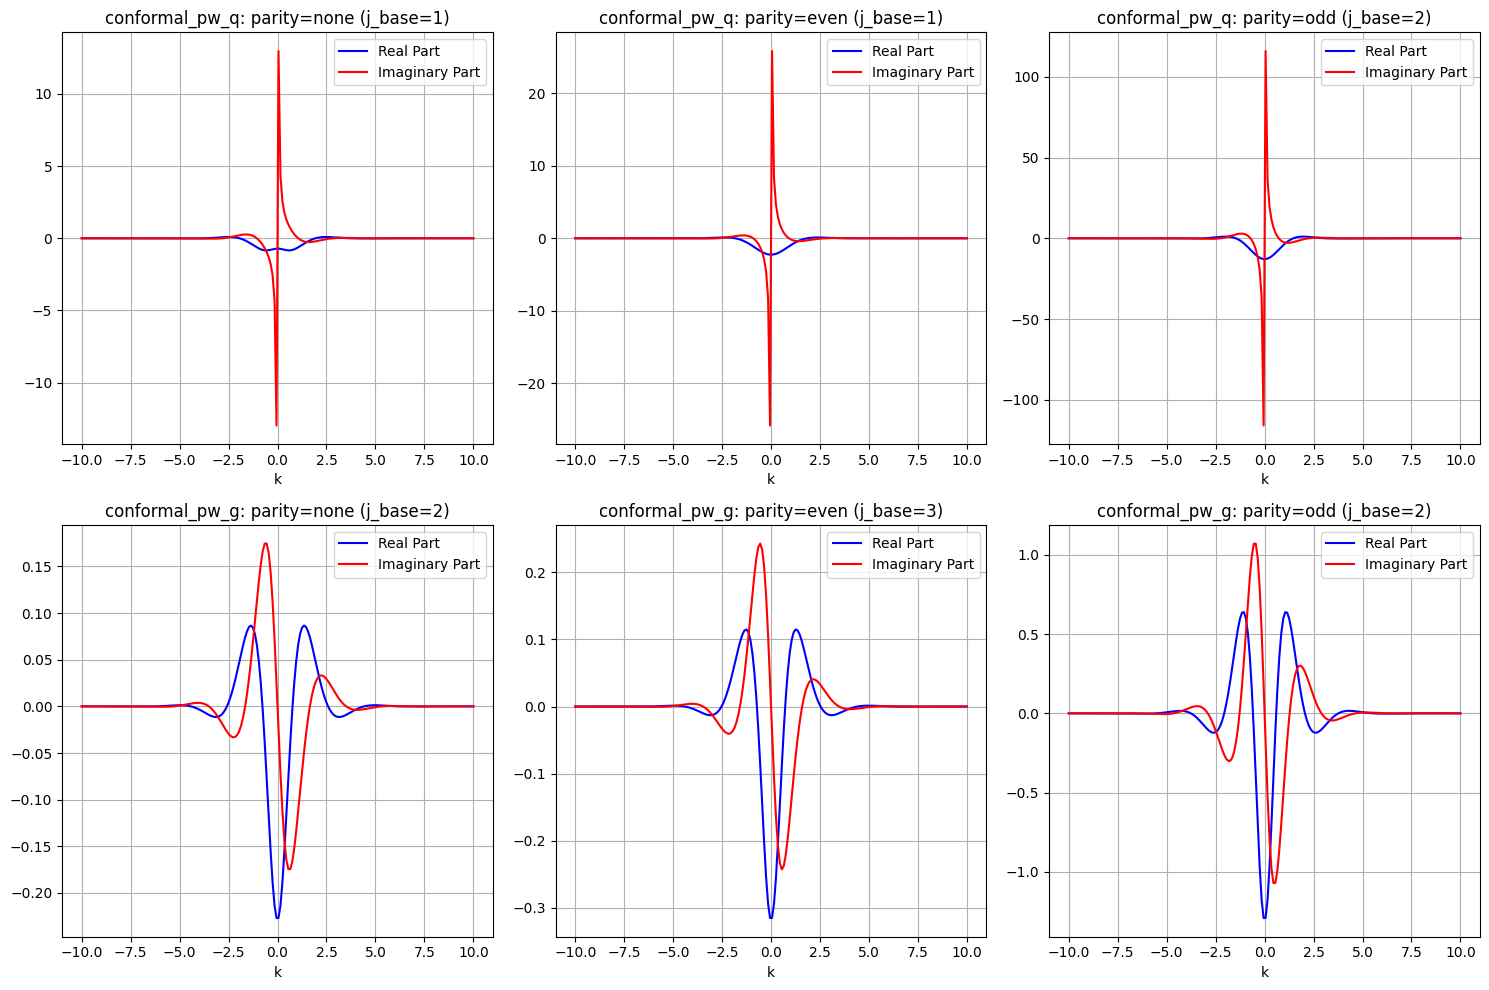

In [13]:
def plot_conformal_pw_q(x, eta, k_range=(-10, 10), num_points=100, parity="even", ax=None):
    j_base = j_base_q(parity)
    k_values = np.linspace(k_range[0], k_range[1], num_points)
    j_values = j_base + 1j * k_values
    result = vectorized_conformal_pw_q(j_values, x, eta, parity=parity)
    real_part = np.real(result)
    imag_part = np.imag(result)

    if ax is None:  # Standalone plot
        _, ax = plt.subplots(figsize=(12, 8))

    ax.plot(k_values, real_part, label="Real Part", color="b")
    ax.plot(k_values, imag_part, label="Imaginary Part", color="r")
    ax.set_xlabel('k')
    ax.set_title(f'conformal_pw_q ({parity}, j = {j_base})')
    ax.grid(True)
    ax.legend()

def plot_conformal_pw_g(x, eta, k_range=(-10, 10), num_points=100, parity="even", ax=None):
    j_base = j_base_q(parity)
    k_values = np.linspace(k_range[0], k_range[1], num_points)
    j_values = j_base + 1j * k_values
    result = vectorized_conformal_pw_g(j_values, x, eta, parity=parity)
    real_part = np.real(result)
    imag_part = np.imag(result)

    if ax is None:  # Standalone plot
        _, ax = plt.subplots(figsize=(12, 8))

    ax.plot(k_values, real_part, label="Real Part", color="b")
    ax.plot(k_values, imag_part, label="Imaginary Part", color="r")
    ax.set_title(f'conformal_pw_g ({parity}, j = {j_base})')
    ax.set_xlabel('k')
    ax.grid(True)
    ax.legend()

def plot_conformal_pw_qg():
    # Set up a 2x3 grid for the subplots
    _, axes = plt.subplots(2, 3, figsize=(15, 10))

    # List of parities to iterate through
    parities = ["none", "even", "odd"]

    # Plot the data for `plot_conformal_pw_q`
    for i, parity in enumerate(parities):
        plot_conformal_pw_q(.1, 1/3, k_range=(-10, 10), num_points=200, parity=parity, ax=axes[0, i])
        axes[0, i].set_title(f"conformal_pw_q: parity={parity} (j_base={j_base_q(parity)})")

    # Plot the data for `plot_conformal_pw_g`
    for i, parity in enumerate(parities):
        plot_conformal_pw_g(.1, 1/3, k_range=(-10, 10), num_points=200, parity=parity, ax=axes[1, i])
        axes[1, i].set_title(f"conformal_pw_g: parity={parity} (j_base={j_base_g(parity)})")

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the combined plots
    plt.show()
    
plot_conformal_pw_qg()

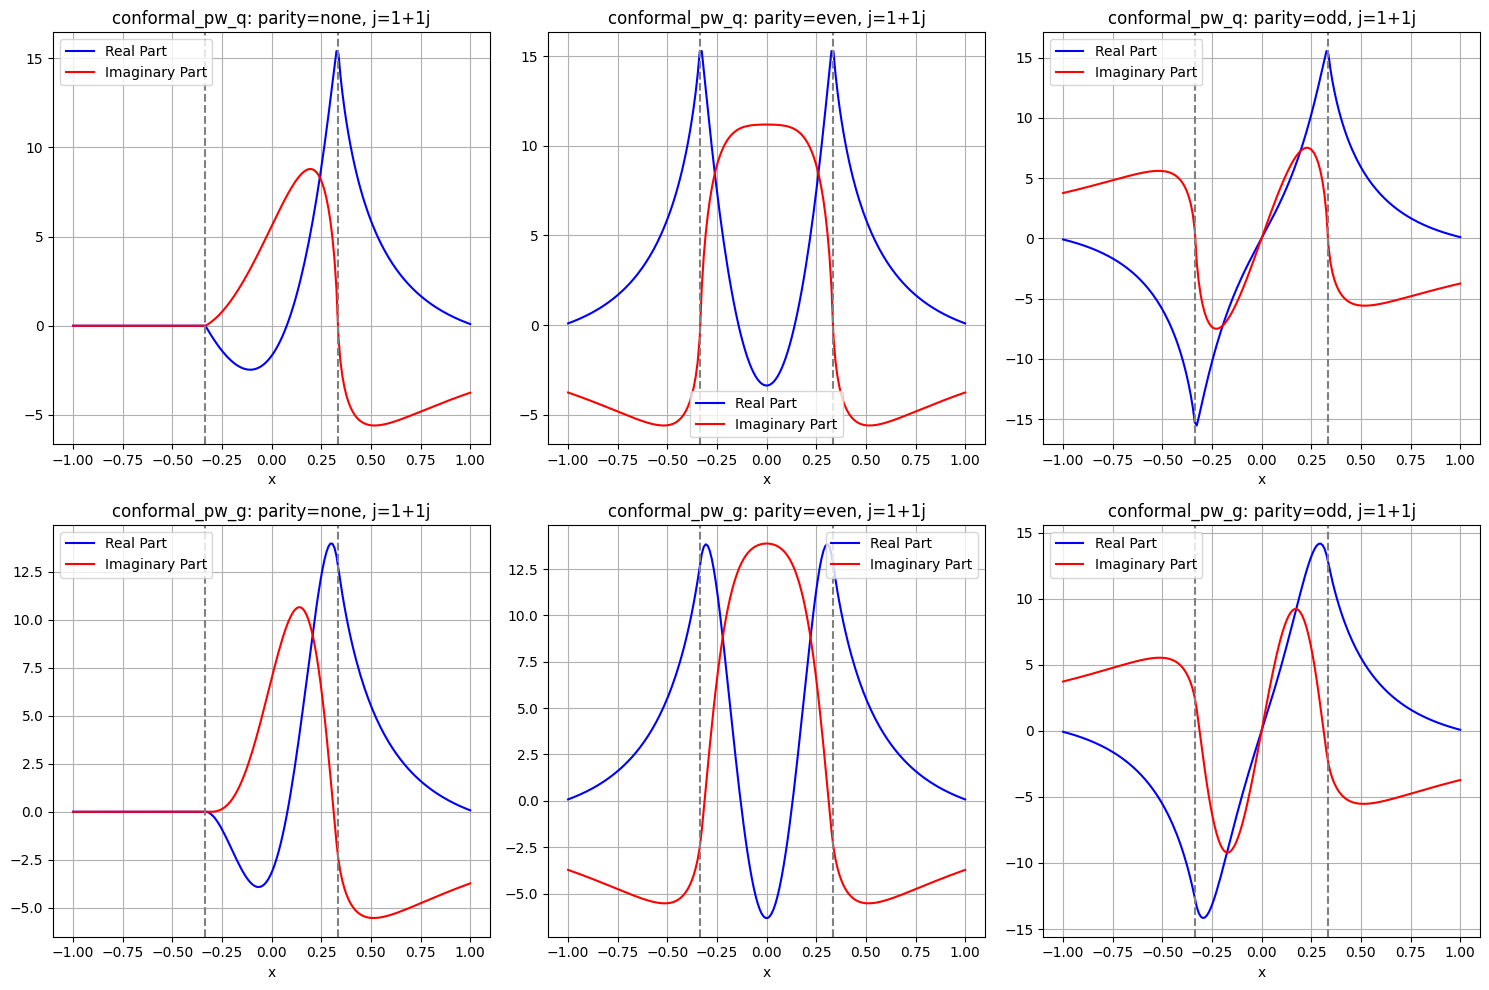

In [5]:
def plot_conformal_pw_q_over_x(eta, x_range=(-1, 1), j = 1 + 1j , num_points=100, parity="even", ax=None):
    #j = 1 + 1j  # Fixed j value
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    result = vectorized_conformal_pw_q(j, x_values, eta, parity=parity)*np.sin(np.pi*j)
    real_part = np.real(result)
    imag_part = np.imag(result)

    if ax is None:  # Standalone plot
        _, ax = plt.subplots(figsize=(20, 8))

    ax.plot(x_values, real_part, label="Real Part", color="b")
    ax.plot(x_values, imag_part, label="Imaginary Part", color="r")
    ax.axvline(x=eta, linestyle='--', color='gray')
    ax.axvline(x=-eta, linestyle='--', color='gray')
    ax.set_xlabel('x')
    ax.set_title(f'conformal_pw_q ({parity}, j = {j})')
    ax.grid(True)
    ax.legend()


def plot_conformal_pw_g_over_x(eta, x_range=(-1, 1), j = 2+1j, num_points=100, parity="even", ax=None):
    j = 2 + 1j  # Fixed j value
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    result = vectorized_conformal_pw_g(j, x_values, eta, parity=parity)*np.sin(np.pi*j)
    real_part = np.real(result)
    imag_part = np.imag(result)

    if ax is None:  # Standalone plot
        _, ax = plt.subplots(figsize=(12, 8))

    ax.plot(x_values, real_part, label="Real Part", color="b")
    ax.plot(x_values, imag_part, label="Imaginary Part", color="r")
    ax.axvline(x=eta, linestyle='--', color='gray')
    ax.axvline(x=-eta, linestyle='--', color='gray')
    ax.set_xlabel('x')
    ax.set_title(f'conformal_pw_g ({parity}, j = {j})')
    ax.grid(True)
    ax.legend()


def plot_conformal_pw_qg_over_x(eta,x_range=(-1,1)):
    # Set up a 2x3 grid for the subplots
    _, axes = plt.subplots(2, 3, figsize=(15, 10))

    # List of parities to iterate through
    parities = ["none", "even", "odd"]

    # Plot the data for `plot_conformal_pw_q`
    for i, parity in enumerate(parities):
        plot_conformal_pw_q_over_x(eta, x_range, num_points=200, parity=parity, ax=axes[0, i])
        axes[0, i].set_title(f"conformal_pw_q: parity={parity}, j=1+1j")


    # Plot the data for `plot_conformal_pw_g`
    for i, parity in enumerate(parities):
        plot_conformal_pw_g_over_x(eta, x_range, num_points=200, parity=parity, ax=axes[1, i])
        axes[1, i].set_title(f"conformal_pw_g: parity={parity}, j=1+1j")

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the combined plots
    plt.show()


# Call the modified function
plot_conformal_pw_qg_over_x(1/3,(-1,1))


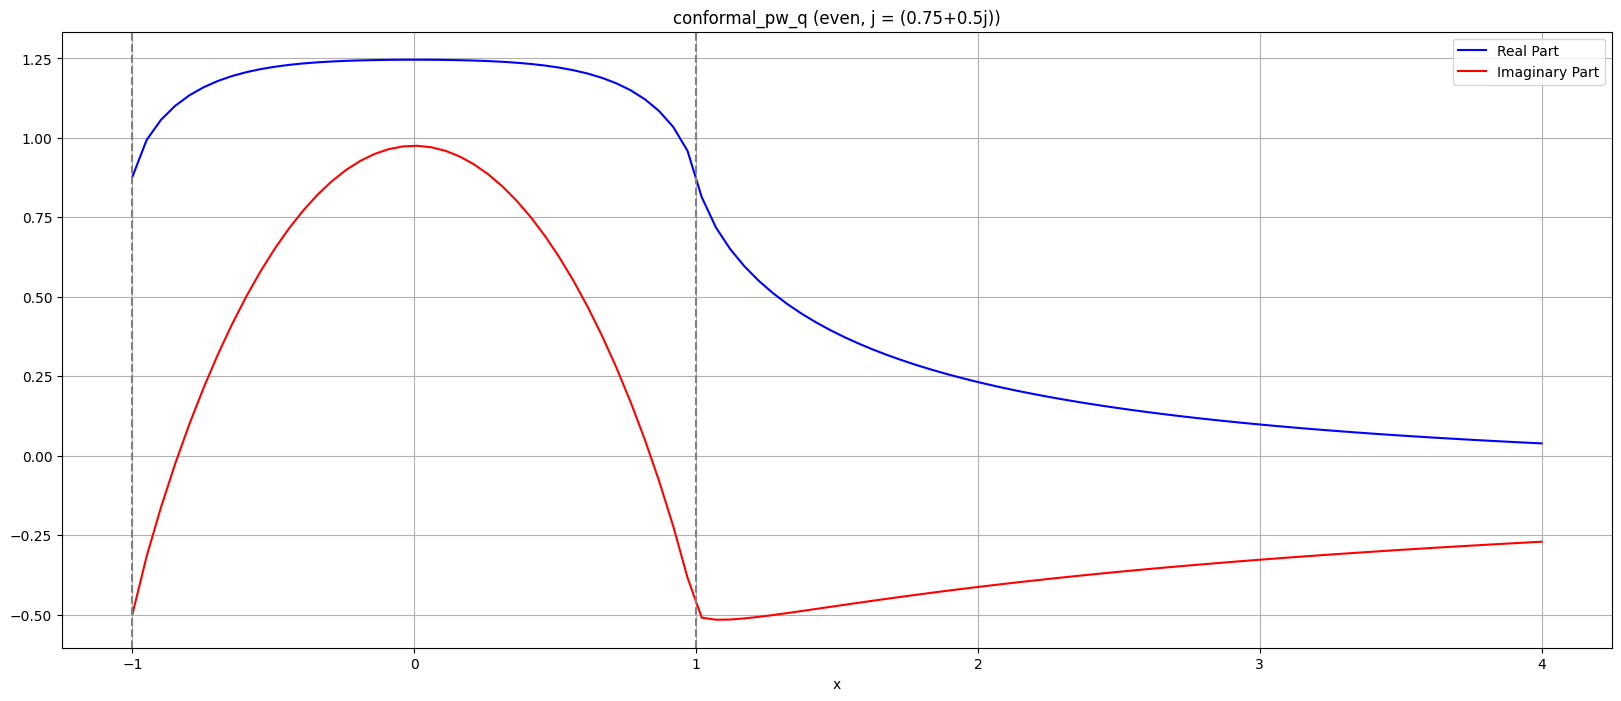

In [6]:
plot_conformal_pw_q_over_x(1,(-1,4),3/4 + .5j)

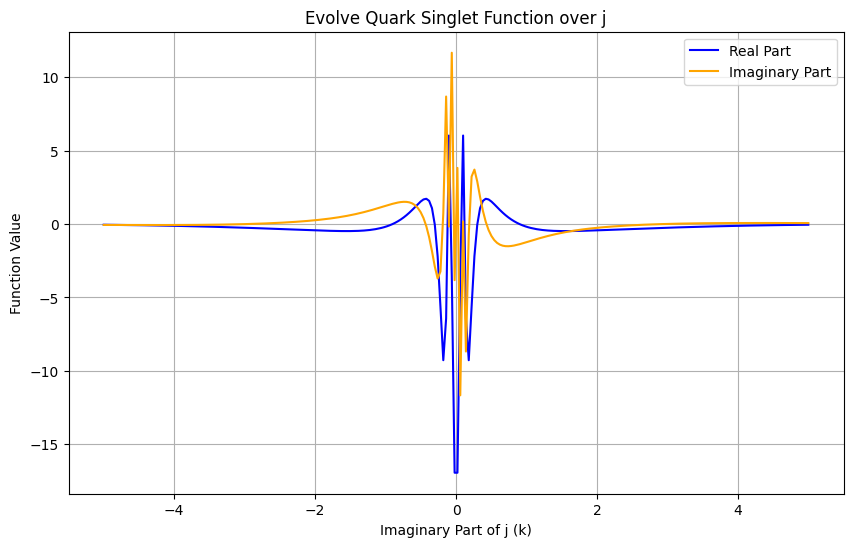

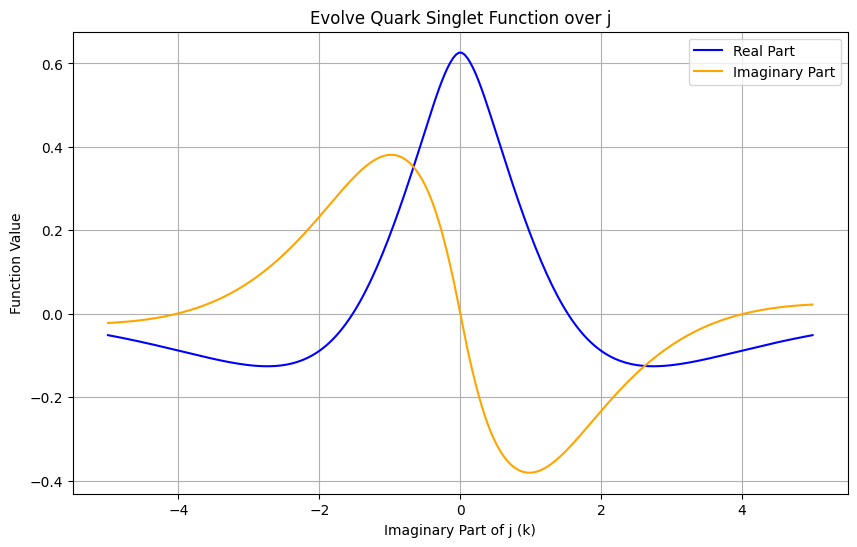

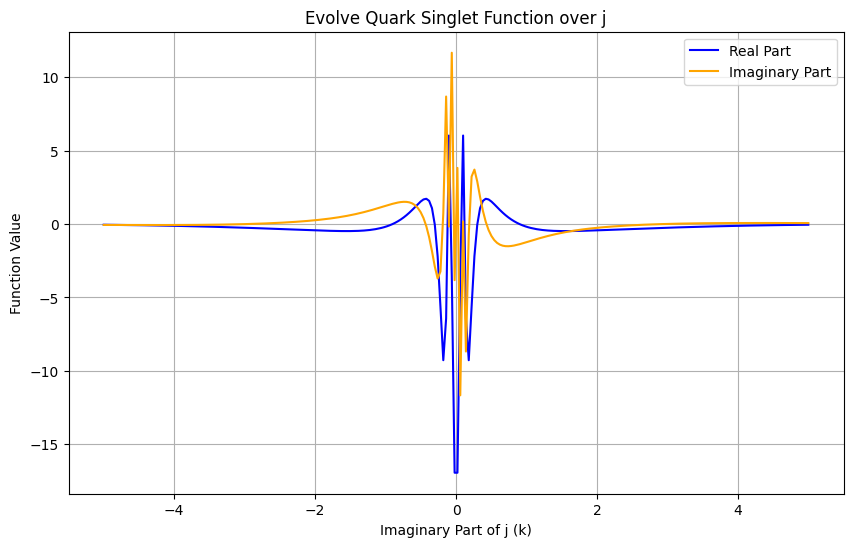

In [14]:
# Plot evolve_quark_singlet over imaginary j
def plot_j_evolve_quark_singlet(eta, t, mu,parity="even"):
    """
    Plots evolve_quark_singlet(j, eta, t, mu) over a complex domain of j.

    Parameters:
    - eta (float): Parameter for the evolve_quark_singlet function.
    - t (float): Parameter for the evolve_quark_singlet function.
    - mu (float): Parameter for the evolve_quark_singlet function.
    """
    if parity not in ["even","odd","none"]:
        raise ValueError("Parity must be even, odd or none")
    j_base = j_base_q(parity)

    # Generate j values: j = j_base + 1j * k where -10 <= k <= 10
    k_values = np.linspace(-5, 5, 250)
    j_values = j_base + 1j * k_values

    # Compute the function values in parallel
    results = Parallel(n_jobs=-1)(delayed(evolve_quark_singlet)(j, eta, t, mu,evolve_type = "vector") for j in j_values)

    # Separate the real and imaginary parts for plotting
    real_parts = [np.real(r) for r in results]
    imag_parts = [np.imag(r) for r in results]

    # Plotting
    plt.figure(figsize=(10, 6))

    plt.plot(k_values, real_parts, label='Real Part', color='blue')
    plt.plot(k_values, imag_parts, label='Imaginary Part', color='orange')

    plt.title('Evolve Quark Singlet Function over j')
    plt.xlabel('Imaginary Part of j (k)')
    plt.ylabel('Function Value')
    plt.legend()
    plt.grid(True)

    plt.show()

# Example usage
eta = 1/3
t = -1e-2
mu = 2
plot_j_evolve_quark_singlet(eta, t, mu,"even")
plot_j_evolve_quark_singlet(eta, t, mu,"odd")
plot_j_evolve_quark_singlet(eta, t, mu,"none")

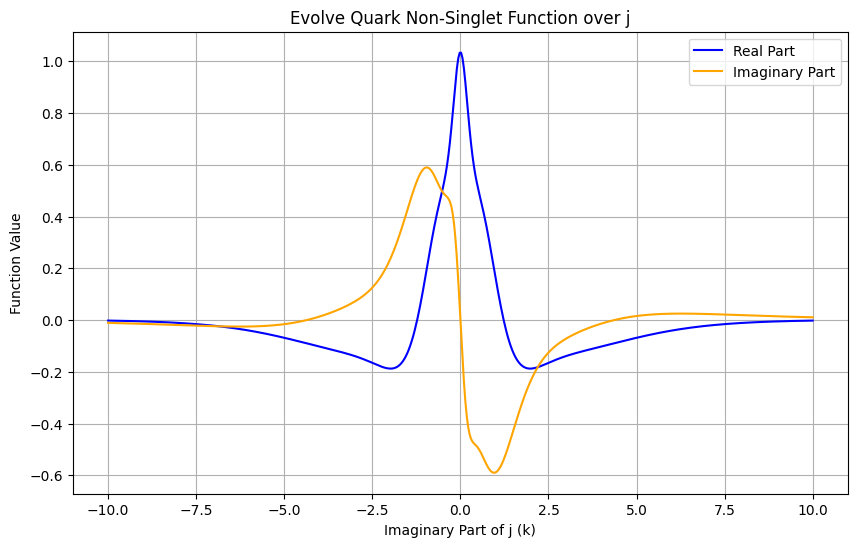

In [15]:
# Plot evolve_quark_non_singlet over imaginary j
def plot_j_evolve_quark_non_singlet(eta, t, mu):
    """
    Plots evolve_quark_singlet(j, eta, t, mu) over a complex domain of j.

    Parameters:
    - eta (float): Parameter for the evolve_quark_singlet function.
    - t (float): Parameter for the evolve_quark_singlet function.
    - mu (float): Parameter for the evolve_quark_singlet function.
    """

    j_base = 1

    # Generate j values: j = j_base + 1j * k where -10 <= k <= 10
    k_values = np.linspace(-10, 10, 500)
    j_values = j_base + 1j * k_values

    # Compute the function values in parallel
    results = Parallel(n_jobs=-1)(delayed(evolve_quark_non_singlet)(j,eta,t,mu,evolve_type = "NonSingletIsovector") for j in j_values)

    # Separate the real and imaginary parts for plotting
    real_parts = [np.real(r) for r in results]
    imag_parts = [np.imag(r) for r in results]

    # Plotting
    plt.figure(figsize=(10, 6))

    plt.plot(k_values, real_parts, label='Real Part', color='blue')
    plt.plot(k_values, imag_parts, label='Imaginary Part', color='orange')

    plt.title('Evolve Quark Non-Singlet Function over j')
    plt.xlabel('Imaginary Part of j (k)')
    plt.ylabel('Function Value')
    plt.legend()
    plt.grid(True)

    plt.show()

# Example usage
eta = 1/3
t = 1e-2
mu = 2
plot_j_evolve_quark_non_singlet(eta, t, mu)


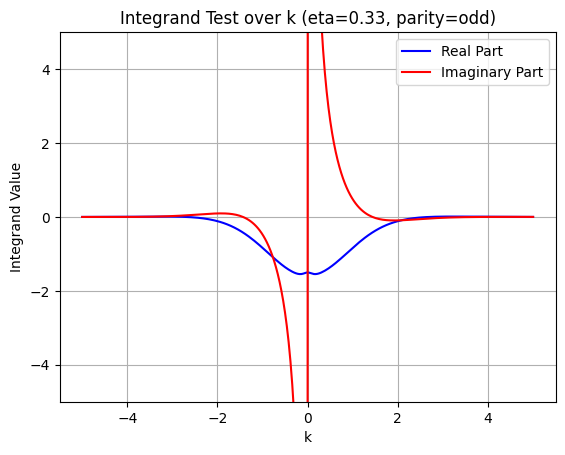

In [8]:
# Parallelize the function over k values with eta as a parameter
def parallel_integrand(k_values, eta, parity="even"):
    # Example parameters (replace with actual values)
    x = 0.1
    t = -1e-2
    mu = 2
    Nf = 3
    evolve_type = "vector"
    error_type = "central"
    results = Parallel(n_jobs=-1)(
        delayed(integrand_test)(k, x, eta, t, mu, Nf, evolve_type, parity, error_type) for k in k_values
    )
    return np.array(results)

# Define a plotting function that takes eta as a parameter
def plot_integrand_over_k(eta, k_range=(-5, 5), num_points=250, parity="even"):
    k_values = np.linspace(k_range[0], k_range[1], num_points)
    results = parallel_integrand(k_values, eta, parity)

    # Plot the results
    plt.plot(k_values, results.real, label="Real Part", color="b")
    plt.plot(k_values, results.imag, label="Imaginary Part", color="r")
    plt.xlabel('k')
    plt.ylabel('Integrand Value')
    plt.title(f'Integrand Test over k (eta={eta:.2f}, parity={parity})')
    plt.grid(True)
    plt.legend()
    plt.ylim(-5, 5)
    plt.show()

    # Clean up
    del k_values, results

# Example usage
plot_integrand_over_k(eta=1/3, k_range=(-5, 5), num_points=250, parity="odd")


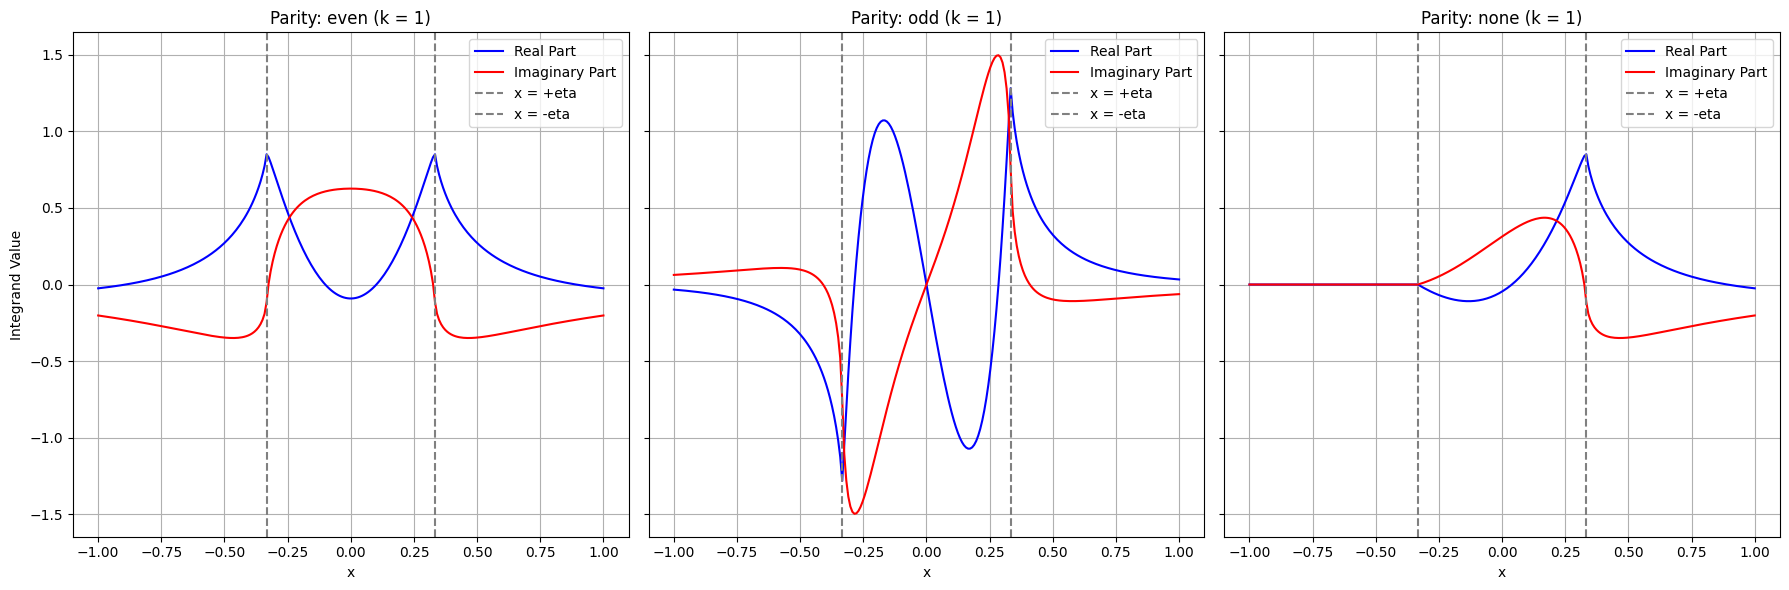

In [9]:
# Plot integrand over x
def integrand_test_x(x, k, eta, t, mu, Nf=3, evolve_type="vector", parity="even", error_type="central"):
    # Determine value on the real axis by parity assignment
    if parity not in ["even", "odd", "none"]:
        raise ValueError("Parity must be even, odd or none")
    j_base = j_base_q(parity)
    z = j_base + 1j * k
    dz = 1j
    pw_val = conformal_pw_q(z, x, eta, parity)
    mom_val = evolve_quark_singlet(z, eta, t, mu, Nf, evolve_type, error_type)
    result = -.5j * dz * pw_val * mom_val
    return np.complex128(result)

# Parallelize the function over x values
def parallel_integrand_x(x_values, eta, k=0, parity="even"):
    # Example parameters (replace with actual values)
    t = -1e-2
    mu = 2
    Nf = 3
    evolve_type = "vector"
    error_type = "central"
    results = Parallel(n_jobs=-1)(
        delayed(integrand_test_x)(x, k, eta, t, mu, Nf, evolve_type, parity, error_type) for x in x_values
    )
    return np.array(results)

# Plot integrand over x for all parities
def plot_integrand_all_parities(x_values, eta, k=0):
    # Define parities
    parities = ["even", "odd", "none"]
    num_parities = len(parities)

    # Create subplots for each parity
    fig, axes = plt.subplots(1, num_parities, figsize=(18, 6), sharey=True)

    for i, parity in enumerate(parities):
        # Parallel computation for the given parity
        results_x = parallel_integrand_x(x_values, eta, k=k, parity=parity)

        # Plot real and imaginary parts
        axes[i].plot(x_values, results_x.real, label="Real Part", color="b")
        axes[i].plot(x_values, results_x.imag, label="Imaginary Part", color="r")
        axes[i].axvline(x=eta, linestyle='--', color='gray', label='x = +eta')
        axes[i].axvline(x=-eta, linestyle='--', color='gray', label='x = -eta')
        axes[i].set_title(f'Parity: {parity} (k = {k})')
        axes[i].set_xlabel('x')
        axes[i].grid(True)
        if i == 0:
            axes[i].set_ylabel('Integrand Value')  # Add y-axis label to the first plot
        axes[i].legend()

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


# Example usage
x_values = np.linspace(-1, 1, 250)
k_fixed = 1  # Fix k value
eta_fixed = 1 / 3

# Call the function to plot for all parities
plot_integrand_all_parities(x_values, eta_fixed, k=k_fixed)

# Clean up
del x_values



Mellin-Barnes Integral

In [4]:
# Mellin-Barnes integral with parallelization over k-values
def mellin_barnes_singlet_q(j_max, x, eta, t, mu, Nf=3, evolve_type="vector", error_type="central", n_jobs=-1,n_k = 10000,real_imag ="real"):
    """
    Numerically evaluate the Mellin-Barnes integral parallel to the imaginary axis
    
    Parameters:
    - j_max (float): Integration range parallel to the imaginary axis
    - x (float): Parton x
    - eta (float): Skewness.
    - t (float): Mandelstam t
    - mu (float): Resolution scale
    - Nf (int 1<= Nf <=3 ): Number of flavors
    - evolve_type (str): Evolve axial or vector GPDs
    - error_type (str): value of input PDFs (central, plus, minus)
    - n_jobs (int): Number of subregions, and thus processes, the integral is split into
    - n_k (int): Number of sampling points within the interval [-j_max,j_max]
    - real_imag (str): Choose to compute real, imaginary part or both
    
    Returns: 
    - The value of the Mellin barnes integral with real and imaginary part.
    """

    # Scale fixed by it's value at the input scale:
    # mellin_barnes_singlet_q(7.5,1e-3,0,-1e-3,1)
    # 1388.4528016573247
    #uv_PDF(1e-3)+dv_PDF(1e-3)+Sv_PDF(1e-3)
    #1781.609324344485
    norm = 1781.61/1388.45

    # Integrand function which returns both real and imaginary parts
    def integrand(k):
        z = j_base + 1j * k
        dz = 1j
        pw_val = conformal_pw_q(z, x, eta, parity)
        mom_val = evolve_quark_singlet(z, eta, t, mu, Nf, evolve_type, error_type)
        result = -.5j * dz * pw_val * mom_val
        return np.float64(result.real), np.float64(result.imag)  # Return both real and imaginary parts

    # Function to integrate over a subinterval of k and extract real and imaginary parts
    def integrate_subinterval(k_values):
        k_min = k_values[0]
        k_max = k_values[-1]
        
        # Define the integrand function that returns both real and imaginary parts
        def combined_integrand(k):
            real_part, imag_part = integrand(k)  # Call the integrand function once
            return real_part, imag_part
        
        # Define the real part integrand function for quad
        def real_part_integrand(k):
            real_part, _ = combined_integrand(k)  # Extract real part
            return real_part
        
        # Define the imaginary part integrand function for quad
        def imag_part_integrand(k):
            _, imag_part = combined_integrand(k)  # Extract imaginary part
            return imag_part
        
        # Integrate real and imaginary parts using quad
        if real_imag == "real":
            real_part, real_error = quad(real_part_integrand, k_min, k_max)
            return real_part, real_error
        elif real_imag == "imag":   
            imag_part, imag_error = quad(imag_part_integrand, k_min, k_max)
            return imag_part, imag_error
        elif real_imag == "both":
            real_part, real_error = quad(real_part_integrand, k_min, k_max)
            imag_part, imag_error = quad(imag_part_integrand, k_min, k_max)
            return real_part, real_error, imag_part, imag_error 
        else :
            raise ValueError("real_imag must be either real, imag or both")

    parity = "odd"
    j_base = j_base_q(parity)

    # Define the number of subintervals (equal to n_jobs)
    n_subintervals = n_jobs if n_jobs > 0 else os.cpu_count()  # Default to all cores if n_jobs isn't specified
    k_range = np.linspace(-j_max, j_max, n_subintervals + 1) # Generate an array that when split into n_subintervals contains k_min and k_max
    k_values_split = []
    # Split the range into equal subintervals
    for i in range(n_subintervals):
        k_values_split.append(k_range[i:i+2])

    # Parallelize the integration over the subintervals of k
    results = Parallel(n_jobs=n_subintervals)(
        delayed(integrate_subinterval)(k_values_split[i]) for i in range(n_subintervals)
    )

    if real_imag == "both":
        real_integral = sum(result[0] for result in results)
        real_error = np.sqrt(sum(result[1]**2 for result in results))
        imag_integral = sum(result[2] for result in results)
        imag_error = np.sqrt(sum(result[3]**2 for result in results))
        integral = real_integral +1j * imag_integral
        error = real_error + 1j * imag_error
    else :
    # Sum the results from all subintervals for real and imaginary parts, and accumulate the errors
        integral = sum(result[0] for result in results)
        error = np.sqrt(sum(result[1]**2 for result in results))

    # Check for the estimated error
    if np.abs(error) > 1e-3:
        print(f"Warning: Large error estimate: {error}")

    return norm * integral

# Mellin-Barnes integral with parallelization over k-values
def mellin_barnes_non_singlet_q(j_max, x, eta, t, mu, Nf=3, error_type="central", n_jobs=-1,real_imag ="real"):
    """
    Numerically evaluate the Mellin-Barnes integral parallel to the imaginary axis
    
    Parameters:
    - j_max (float): Integration range parallel to the imaginary axis
    - x (float): Parton x
    - eta (float): Skewness.
    - t (float): Mandelstam t
    - mu (float): Resolution scale
    - Nf (int 1<= Nf <=3 ): Number of flavors
    - evolve_type (str): Evolve axial or vector GPDs
    - parity (str): Parity to use for the partial wave combinations, either "even" or "odd" (default is "even").
    - error_type (str): value of input PDFs (central, plus, minus)
    - n_jobs (int): Number of subregions, and thus processes, the integral is split into
    - n_k (int): Number of sampling points within the interval [-j_max,j_max]
    - real_imag (str): Choose to compute real part, imaginary part or both
    
    Returns: 
    - The value of the Mellin barnes integral with real and imaginary part.
    """
    # print(mellin_barnes_non_singlet_q(7.5,1e-3,0,-1e-3,1))
    # print(uv_PDF(1e-3)-dv_PDF(1e-3))
    # 27.89404260161029
    # 28.164212232271677
    norm = 28.16/27.89
    # Integrand function which returns both real and imaginary parts
    def integrand_real(k):
        z = j_base + 1j * k
        dz = 1j
        pw_val = conformal_pw_q(z, x, eta, parity=parity)
        mom_val = evolve_quark_non_singlet(z,eta,t,mu,Nf=Nf,evolve_type="NonSingletIsovector",error_type= error_type)
        result = -.5j * dz * pw_val * mom_val
        return result.real
    
    def integrand_imag(k):
        z = j_base + 1j * k
        dz = 1j
        pw_val = conformal_pw_q(z, x, eta, parity=parity)
        mom_val = evolve_quark_non_singlet(z,eta,t,mu,Nf=Nf,evolve_type="NonSingletIsovector",error_type= error_type)
        result = -.5j * dz * pw_val * mom_val
        return result.imag

    # Function to integrate over a subinterval of k and extract real and imaginary parts
    def integrate_subinterval(k_values):
        k_min = k_values[0]
        k_max = k_values[-1]
        
        # Integrate real and imaginary parts using quad
        if real_imag == "real":
            real_part, real_error = quad(integrand_real, k_min, k_max)
            return real_part, real_error
        elif real_imag == "imag":   
            imag_part, imag_error = quad(integrand_imag, k_min, k_max)
            return imag_part, imag_error
        elif real_imag == "both":
            real_part, real_error = quad(integrand_real, k_min, k_max)
            imag_part, imag_error = quad(integrand_imag, k_min, k_max)
            return real_part, real_error, imag_part, imag_error 
        else :
            raise ValueError("real_imag must be either real, imag or both")

    parity = "none"
    j_base = j_base_q(parity)

    # Define the number of subintervals (equal to n_jobs)
    n_subintervals = n_jobs if n_jobs > 0 else os.cpu_count()  # Default to all cores if n_jobs isn't specified
    k_range = np.linspace(-j_max, j_max, n_subintervals + 1) # Generate an array that when split into n_subintervals contains k_min and k_max
    k_values_split = []
    # Split the range into equal subintervals
    for i in range(n_subintervals):
        k_values_split.append(k_range[i:i+2])
    # Print the subintervals to verify
    # for i in range(len(k_values_split)):
    #     print(k_values_split[i])    
    # Parallelize the integration over the subintervals of k
    results = Parallel(n_jobs=n_subintervals)(
        delayed(integrate_subinterval)(k_values_split[i]) for i in range(n_subintervals)
    )

    if real_imag == "both":
        real_integral = sum(result[0] for result in results)
        real_error = np.sqrt(sum(result[1]**2 for result in results))
        imag_integral = sum(result[2] for result in results)
        imag_error = np.sqrt(sum(result[3]**2 for result in results))
        integral = real_integral +1j * imag_integral
        error = real_error + 1j * imag_error
    else :
    # Sum the results from all subintervals for real and imaginary parts, and accumulate the errors
        integral = sum(result[0] for result in results)
        error = np.sqrt(sum(result[1]**2 for result in results))

    # Check for the estimated error
    if np.abs(error) > 1e-3:
        print(f"Warning: Large error estimate: {error}")
    return norm * integral

In [76]:
# def test(n_jobs):
#     n_subintervals = n_jobs if n_jobs > 0 else os.cpu_count()  # Default to all cores if n_jobs isn't specified
#     k_range = np.linspace(-7.5, 7.5, n_subintervals + 1 )
#     k_values_split = []
#     # Split the range into equal subintervals
#     for i in range(n_subintervals):
#         k_values_split.append(k_range[i:i+2])

#     # Print the subintervals to verify
#     for i in range(len(k_values_split)):
#         print(k_values_split[i])

# test(4)

In [5]:
def plot_mellin_barnes_singlet_q(eta, t, mu, real_imag="real", sampling="true", n_init=10, n_points=30, x_0=-1, x_1=1):
    """
    Plot the real or imaginary part of the Mellin-Barnes non-singlet Q function
    with dynamically adjusted x intervals, including error bars.
    The function supports both positive and negative intervals for x.
    """
    # Ensure x_0 < x_1 for a valid range
    if x_0 >= x_1:
        raise ValueError("x_0 must be less than x_1.")

    if sampling == "true":
        x_values = np.linspace(x_0, x_1, n_init)

        # Measure time for sampling initial points
        start_time_sampling = time.time()
        results = [mellin_barnes_singlet_q(7.5, x, eta, t, mu, real_imag=real_imag) for x in x_values]
        end_time_sampling = time.time()

        # Compute differences and scale intervals
        diffs = np.abs(np.diff(results))
        scaled_intervals = diffs / np.sum(diffs)
        cumulative_intervals = np.cumsum(np.insert(scaled_intervals, 0, 0))

        # Output sampling time
        print(f"Time for initial sampling: {end_time_sampling - start_time_sampling:.6f} seconds")

    # Measure time for adaptive grid computation
    start_time_adaptive = time.time()
    if sampling == "true":
        x_values = np.interp(np.linspace(0, 1, n_points), cumulative_intervals, x_values)
    else:
        x_values = np.linspace(x_0, x_1, n_points)

    results = [mellin_barnes_singlet_q(7.5, x, eta, t, mu, real_imag=real_imag) for x in x_values]
    results_plus = [mellin_barnes_singlet_q(7.5, x, eta, t, mu, real_imag=real_imag, error_type="plus") for x in x_values]
    results_minus = [mellin_barnes_singlet_q(7.5, x, eta, t, mu, real_imag=real_imag, error_type="minus") for x in x_values]
    end_time_adaptive = time.time()

    # Extract real and imaginary parts of results
    real_parts = np.real(results)
    imag_parts = np.imag(results)

    # Compute real and imaginary error bars
    real_errors_plus = abs(np.real(results_plus) - real_parts)
    real_errors_minus = abs(real_parts - np.real(results_minus))
    imag_errors_plus = abs(np.imag(results_plus) - imag_parts)
    imag_errors_minus = abs(imag_parts - np.imag(results_minus))

    # Output plot generation time
    print(f"Time for plot computation: {end_time_adaptive - start_time_adaptive:.6f} seconds")

    # Plot the chosen part with error bars
    if real_imag == "real":
        plt.errorbar(
            x_values, real_parts,
            yerr=(real_errors_minus, real_errors_plus),
            fmt='o', label=(f"$\eta={eta:.2f}$"
                          "\n" 
                          f"$t={t:.2f} \\text{{ GeV}}^2$"
                          "\n" 
                          f"$\\mu = {mu} \\text{{ GeV}}$"
                          ), color='b', capsize=3
        )
        plt.title('Singlet Sea Quark GPD')
    elif real_imag == "imag":
        plt.errorbar(
            x_values, imag_parts,
            yerr=(imag_errors_minus, imag_errors_plus),
            fmt='o', label=(f"$\eta={eta:.2f}$"
                          "\n" 
                          f"$t={t:.2f} \\text{{ GeV}}^2$"
                          "\n" 
                          f"$\\mu = {mu} \\text{{ GeV}}$"
                          ), color='r', capsize=3
        )
        plt.title('Imaginary Part of Singlet Sea Quark GPD')
    elif real_imag == "both":
        plt.errorbar(
            x_values, real_parts,
            yerr=(real_errors_minus, real_errors_plus),
            fmt='o', label=(f"$\eta={eta:.2f}$"
                          "\n" 
                          f"$t={t:.2f} \\text{{ GeV}}^2$"
                          "\n" 
                          f"$\\mu = {mu} \\text{{ GeV}}$"
                          ), color='b', capsize=3
        )
        plt.errorbar(
            x_values, imag_parts,
            yerr=(imag_errors_minus, imag_errors_plus),
            fmt='o', label=(f"$\eta={eta:.2f}$"
                          "\n" 
                          f"$t={t:.2f} \\text{{ GeV}}^2$"
                          "\n" 
                          f"$\\mu = {mu} \\text{{ GeV}}$"
                          ), color='r', capsize=3
        )
        plt.title('Real and Imaginary Part of Singlet Sea Quark GPD')

    # Add vertical lines to separate DGLAP from ERBL region
    plt.axvline(x = eta, linestyle = '--')   
    plt.axvline(x = -eta, linestyle = '--')

    plt.xlim(x_0, x_1)
    plt.xlabel('x')
    plt.legend()
    plt.grid(True)
    plt.show()




    
def plot_mellin_barnes_non_singlet_q(eta, t, mu, real_imag="real", sampling="true", n_init=10, n_points=30, x_0=-1, x_1=1):
    """
    Plot the real or imaginary part of the Mellin-Barnes non-singlet Q function
    with dynamically adjusted x intervals, including error bars.
    The function supports both positive and negative intervals for x.
    """
    # Ensure x_0 < x_1 for a valid range
    if x_0 >= x_1:
        raise ValueError("x_0 must be less than x_1.")

    if sampling == "true":
        x_values = np.linspace(x_0, x_1, n_init)

        # Measure time for sampling initial points
        start_time_sampling = time.time()
        results = [mellin_barnes_non_singlet_q(7.5, x, eta, t, mu, real_imag=real_imag) for x in x_values]
        end_time_sampling = time.time()

        # Compute differences and scale intervals
        diffs = np.abs(np.diff(results))
        scaled_intervals = diffs / np.sum(diffs)
        cumulative_intervals = np.cumsum(np.insert(scaled_intervals, 0, 0))

        # Output sampling time
        print(f"Time for initial sampling: {end_time_sampling - start_time_sampling:.6f} seconds")

    # Measure time for adaptive grid computation
    start_time_adaptive = time.time()
    if sampling == "true":
        x_values = np.interp(np.linspace(0, 1, n_points), cumulative_intervals, x_values)
    else:
        x_values = np.linspace(x_0, x_1, n_points)

    results = [mellin_barnes_non_singlet_q(7.5, x, eta, t, mu, real_imag=real_imag) for x in x_values]
    results_plus = [mellin_barnes_non_singlet_q(7.5, x, eta, t, mu, real_imag=real_imag, error_type="plus") for x in x_values]
    results_minus = [mellin_barnes_non_singlet_q(7.5, x, eta, t, mu, real_imag=real_imag, error_type="minus") for x in x_values]
    end_time_adaptive = time.time()

    # Extract real and imaginary parts of results
    real_parts = np.real(results)
    imag_parts = np.imag(results)

    # Compute real and imaginary error bars
    real_errors_plus = abs(np.real(results_plus) - real_parts)
    real_errors_minus = abs(real_parts - np.real(results_minus))
    imag_errors_plus = abs(np.imag(results_plus) - imag_parts)
    imag_errors_minus = abs(imag_parts - np.imag(results_minus))

    # Output plot generation time
    print(f"Time for plot computation: {end_time_adaptive - start_time_adaptive:.6f} seconds")

    # Plot the chosen part with error bars
    if real_imag == "real":
        plt.errorbar(
            x_values, real_parts,
            yerr=(real_errors_minus, real_errors_plus),
            fmt='o', label=(f"$\eta={eta:.2f}$"
                          "\n" 
                          f"$t={t:.2f} \\text{{ GeV}}^2$"
                          "\n" 
                          f"$\\mu = {mu} \\text{{ GeV}}$"
                          ), color='b', capsize=3
        )
        plt.title('Non-Singlet Isovector GPD')
    elif real_imag == "imag":
        plt.errorbar(
            x_values, imag_parts,
            yerr=(imag_errors_minus, imag_errors_plus),
            fmt='o', label=(f"$\eta={eta:.2f}$"
                          "\n" 
                          f"$t={t:.2f} \\text{{ GeV}}^2$"
                          "\n" 
                          f"$\\mu = {mu} \\text{{ GeV}}$"
                          ), color='r', capsize=3
        )
        plt.title('Imaginary Part of Non-Singlet Isovector GPD')
    elif real_imag == "both":
        plt.errorbar(
            x_values, real_parts,
            yerr=(real_errors_minus, real_errors_plus),
            fmt='o', label=(f"$\eta={eta:.2f}$"
                          "\n" 
                          f"$t={t:.2f} \\text{{ GeV}}^2$"
                          "\n" 
                          f"$\\mu = {mu} \\text{{ GeV}}$"
                          ), color='b', capsize=3
        )
        plt.errorbar(
            x_values, imag_parts,
            yerr=(imag_errors_minus, imag_errors_plus),
            fmt='o', label=(f"$\eta={eta:.2f}$"
                          "\n" 
                          f"$t={t:.2f} \\text{{ GeV}}^2$"
                          "\n" 
                          f"$\\mu = {mu} \\text{{ GeV}}$"
                          ), color='r', capsize=3
        )
        plt.title('Real and Imaginary Part of Non-Singlet Isovector GPD')

    # Add vertical lines to separate DGLAP from ERBL region
    plt.axvline(x = eta, linestyle = '--')   
    plt.axvline(x = -eta, linestyle = '--')

    plt.xlim(x_0, x_1)
    plt.xlabel('x')
    plt.legend()
    plt.grid(True)
    plt.show()


Time for initial sampling: 3.621120 seconds
Time for plot computation: 19.989197 seconds


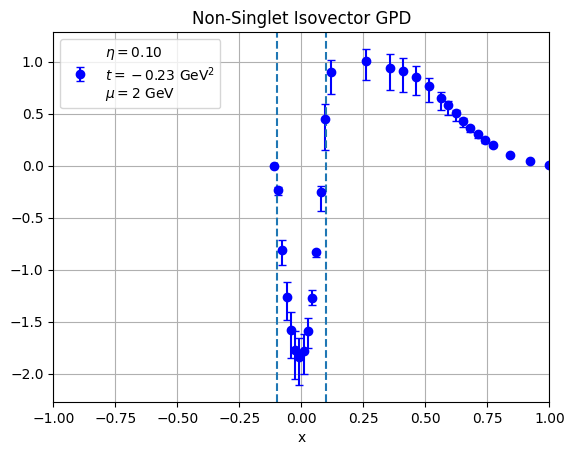

In [7]:
plot_mellin_barnes_non_singlet_q(.1,-0.23,2)

Time for initial sampling: 1.651428 seconds
Time for plot computation: 19.716766 seconds


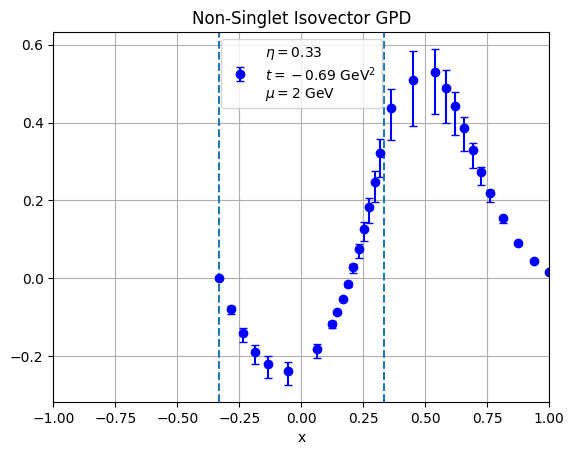

In [8]:
plot_mellin_barnes_non_singlet_q(1/3,-0.69,2)

Time for initial sampling: 1.780654 seconds
Time for plot computation: 17.974161 seconds


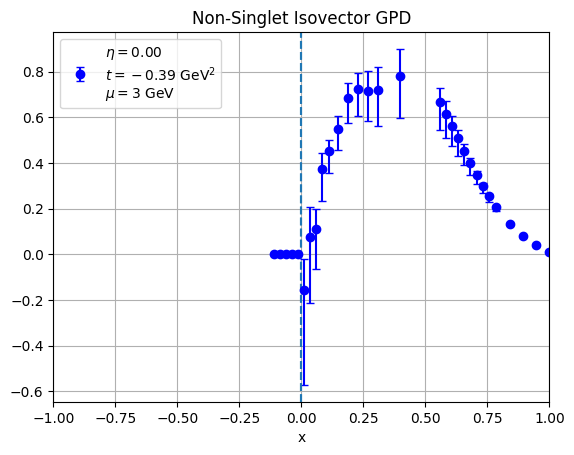

In [9]:
plot_mellin_barnes_non_singlet_q(0,-0.39,3)

Time for initial sampling: 8.062212 seconds
Time for plot computation: 34.673609 seconds


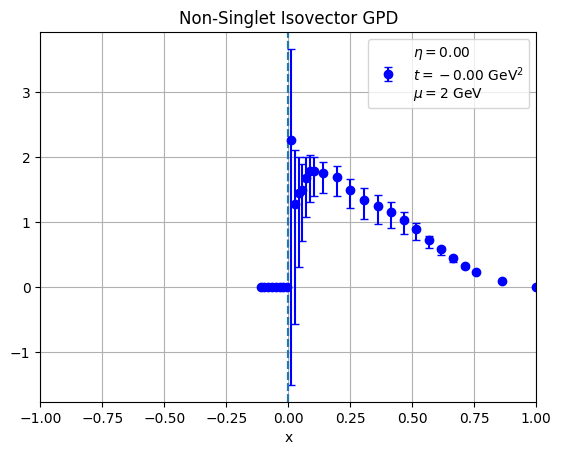

In [6]:
plot_mellin_barnes_non_singlet_q(0,-1e-6,2)